In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
import warnings

sns.set()

In [12]:
file_name = 'data109.csv'
file_name = 'CElegansDataforQuan/' + file_name
df = pd.read_csv(file_name).drop(columns = 'dataset')
df.head()

,HOA,HOB,PVZ,PCBL,PCCL,PCAL,SPCL,PVY,PVX,PVV,...,Speed,Rel.Speed,TailAngle,LtoTips,LtoVul,Spicules,pos_x,pos_y,Lto1tip,PostSperm
0,7.250564,0.196212,2.256619,1.553136,0.839921,NaN,4.466483,3.855752,1.544757,1.232114,...,37.668917,0.0,187.214567,1.0,1.0,0.534955,NaN,NaN,2.0,0
1,7.260670,-0.152221,1.918919,1.459072,0.793116,NaN,4.474740,3.963853,1.495721,1.197282,...,68.464884,0.0,204.706877,1.0,1.0,0.666670,NaN,NaN,2.0,0
2,7.267787,-0.114145,1.817382,1.507194,0.806910,NaN,4.395530,3.982662,1.488530,1.175287,...,100.783681,0.0,208.622899,1.0,1.0,0.717941,NaN,NaN,2.0,0
3,7.273302,-0.114833,1.794856,1.506020,0.807038,NaN,4.406843,3.945074,1.464047,1.162229,...,128.768896,0.0,202.844003,1.0,1.0,0.517402,NaN,NaN,2.0,0
4,7.277263,-0.120575,1.722357,1.508765,0.805350,NaN,4.416791,3.905746,1.383334,1.149996,...,149.802671,0.0,197.065107,1.0,1.0,0.482140,NaN,NaN,2.0,0


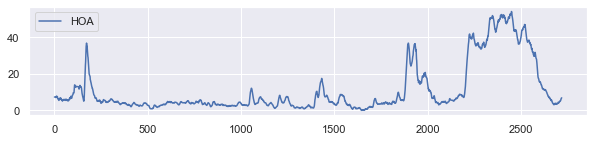

In [13]:
plt.figure(figsize=(10,2))
plt.plot(df['HOA'],label = 'HOA')
plt.legend()
plt.show()

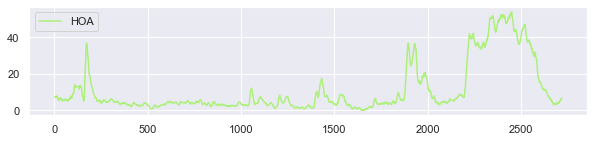

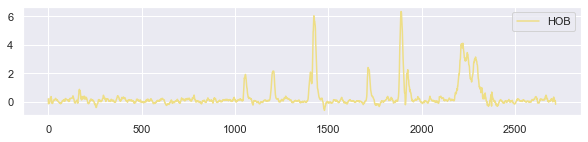

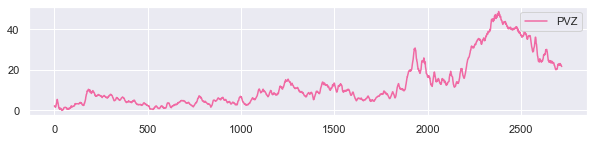

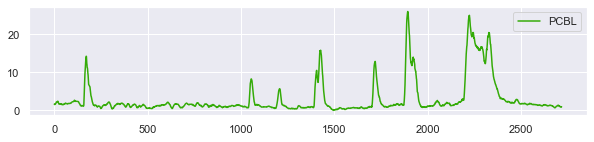

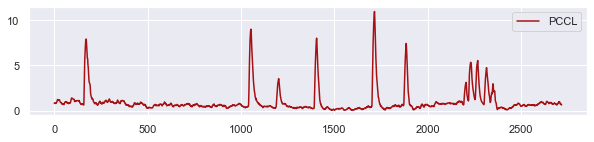

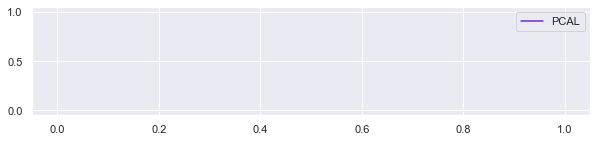

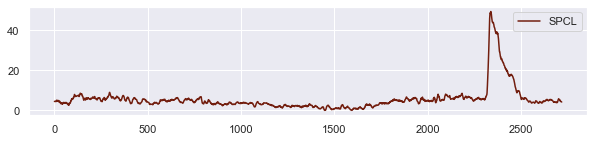

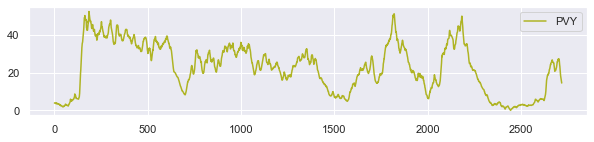

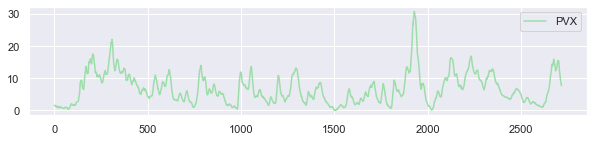

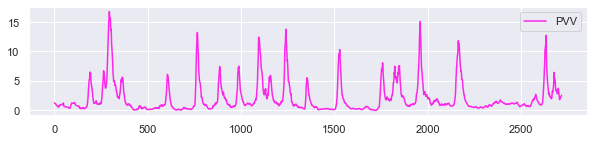

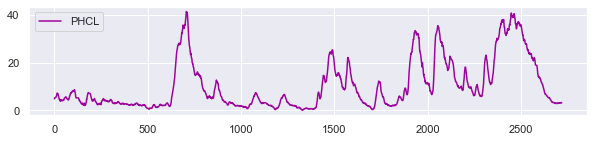

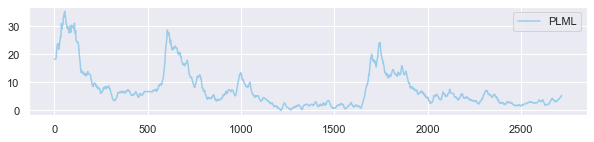

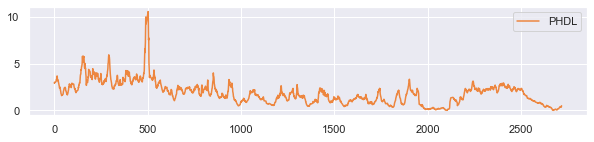

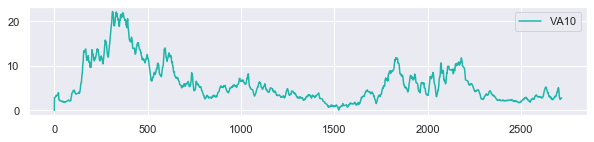

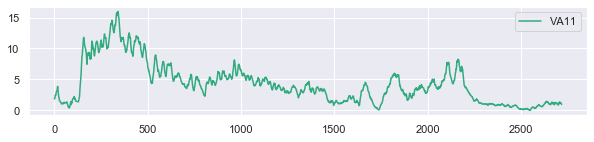

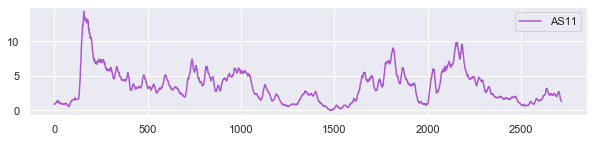

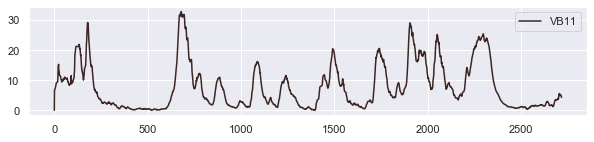

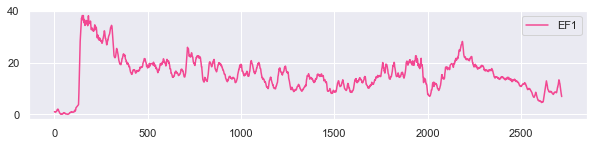

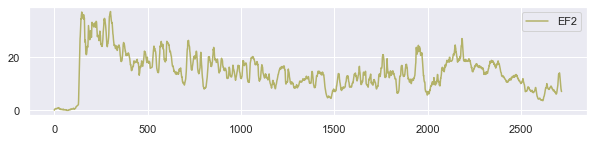

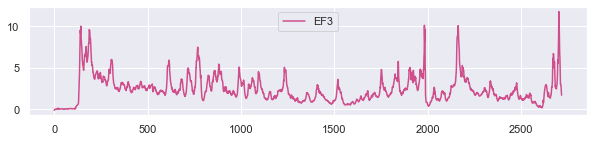

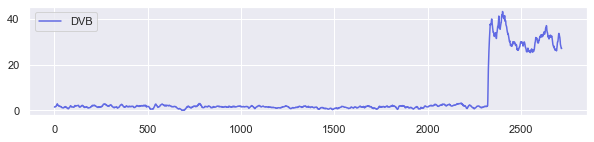

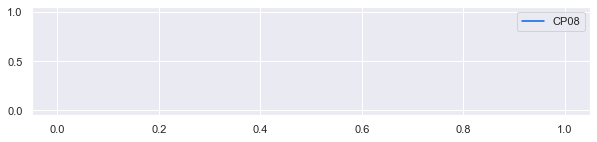

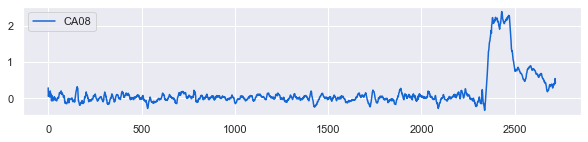

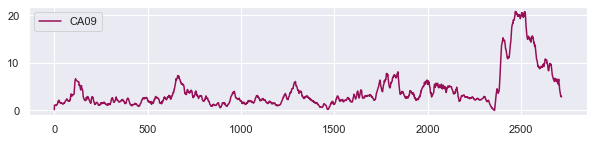

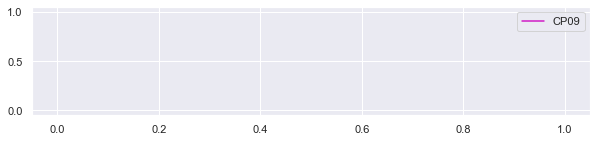

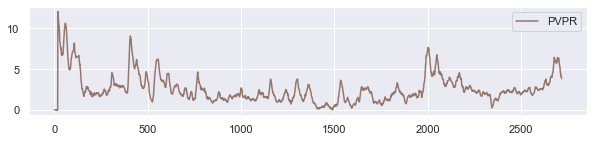

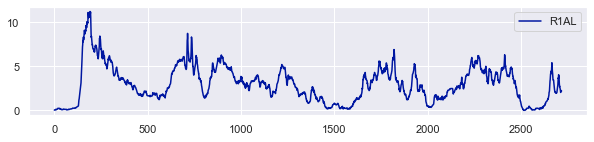

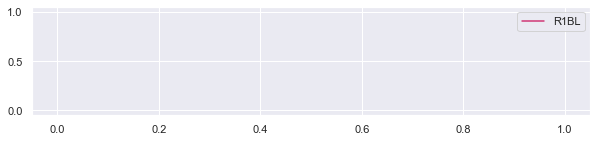

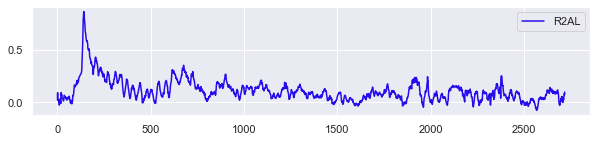

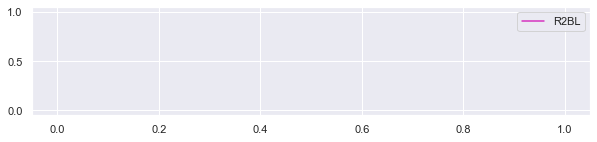

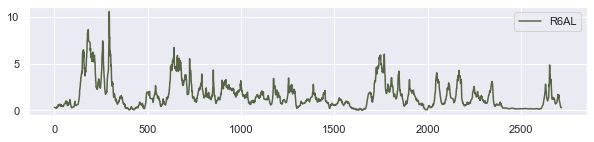

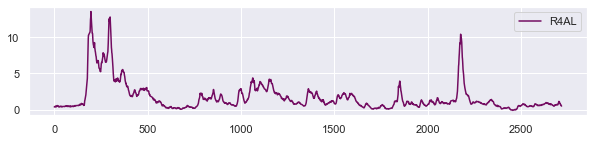

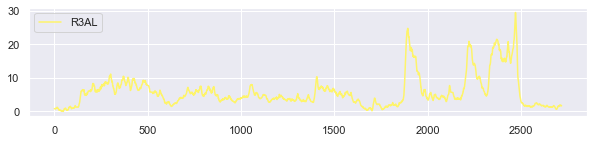

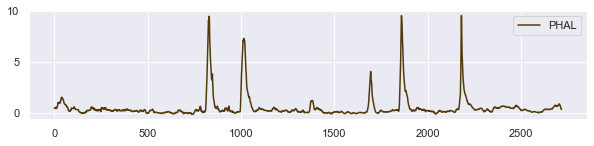

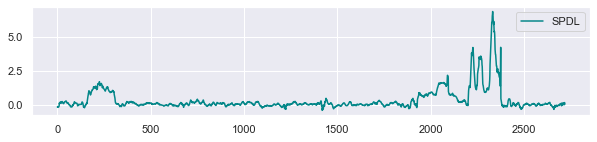

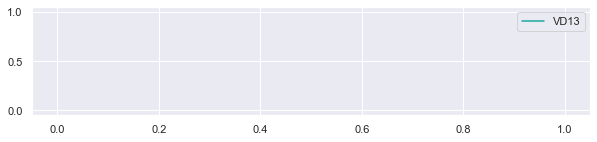

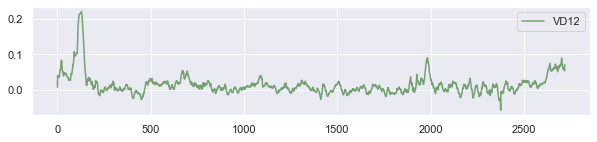

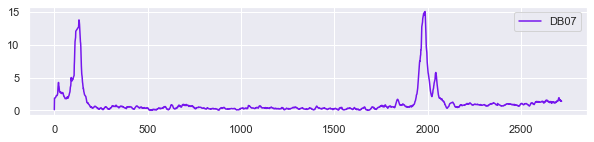

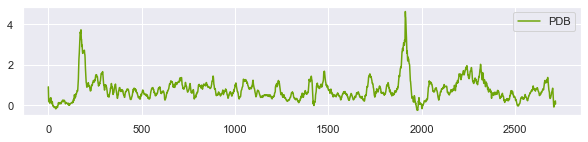

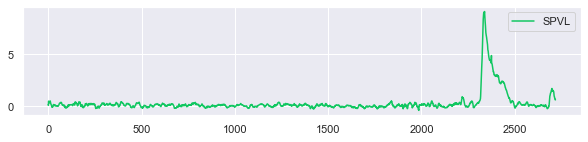

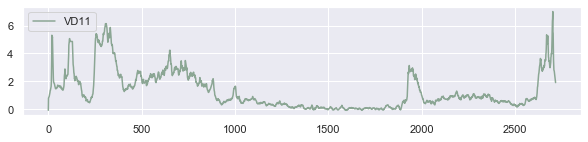

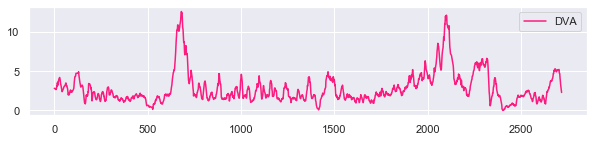

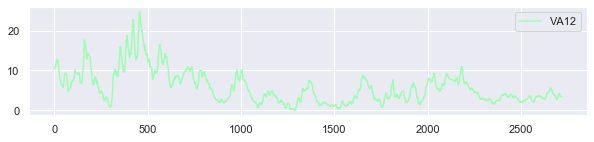

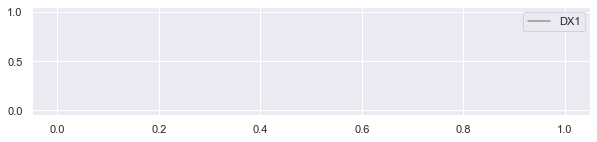

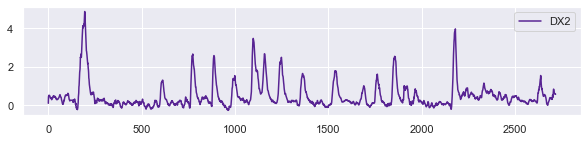

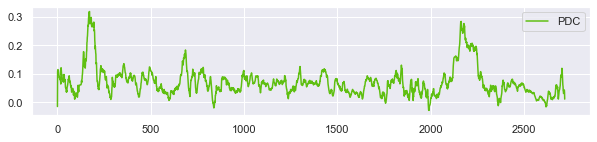

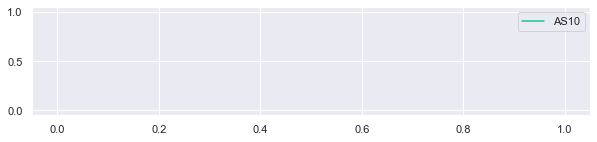

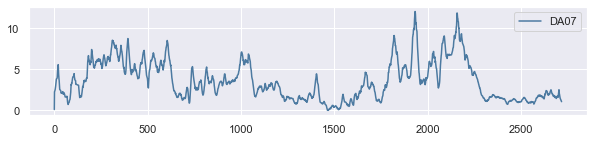

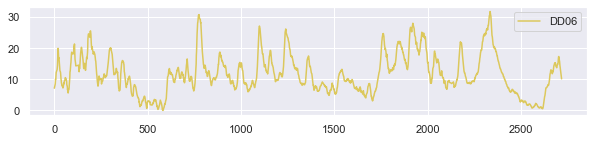

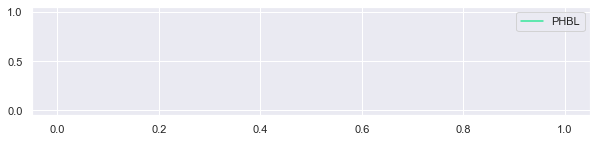

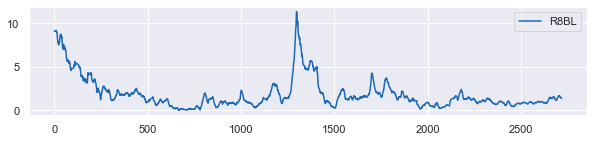

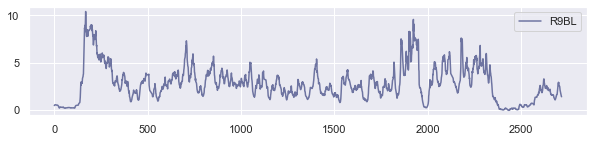

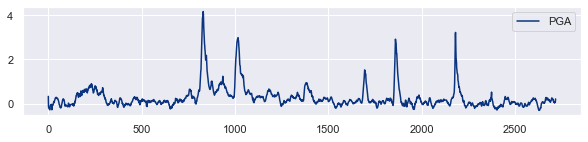

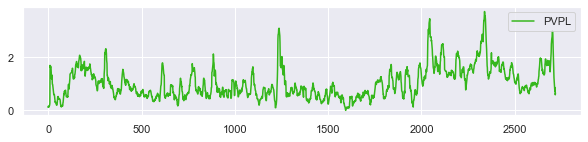

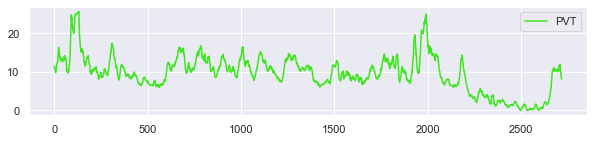

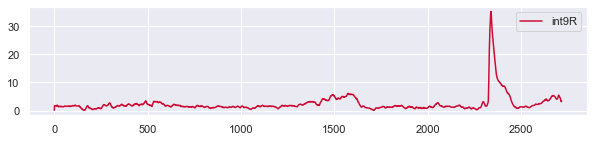

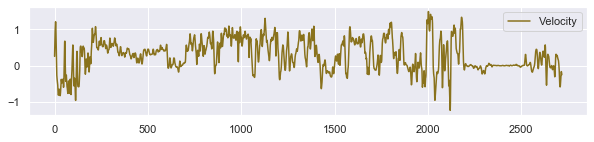

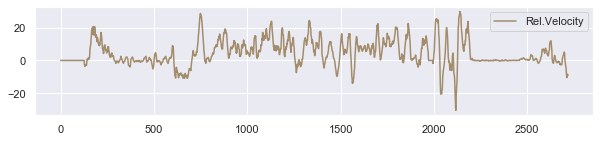

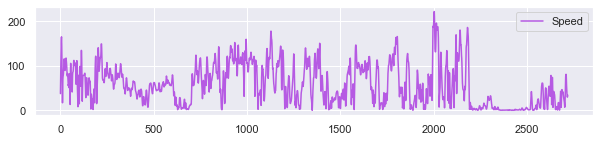

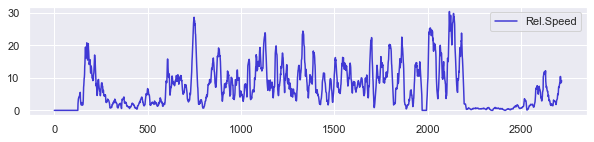

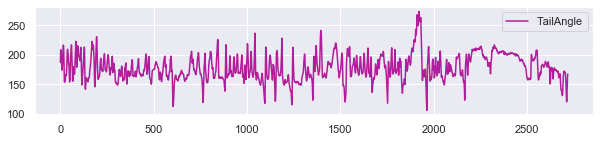

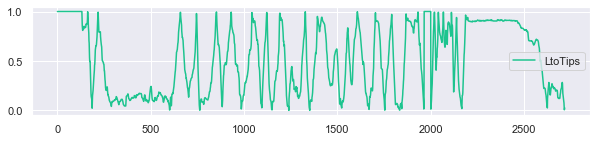

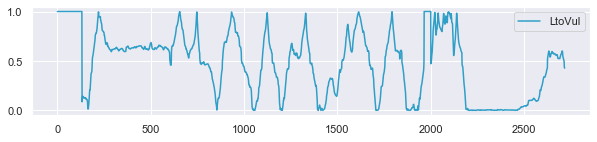

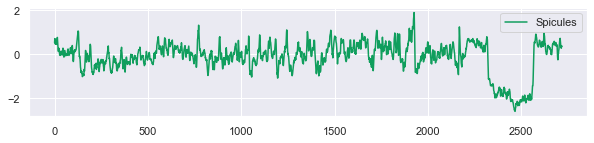

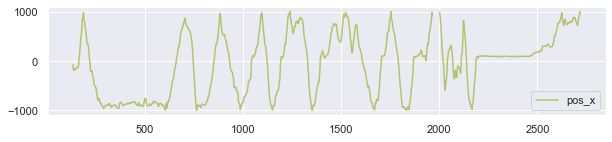

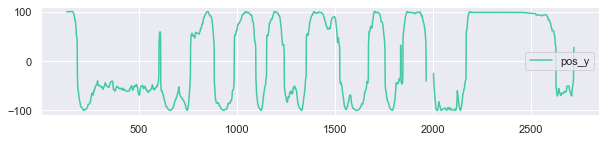

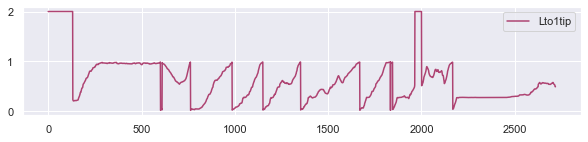

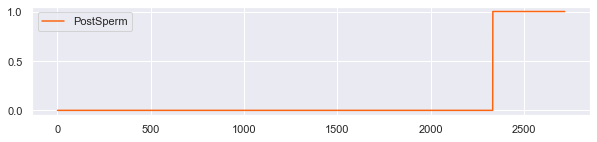

In [14]:
columns = df.columns
columns_num = len(columns) 

for i in range(columns_num):
    plt.figure(figsize=(10,2))
    plt.plot(df[columns[i]],label = columns[i],c=np.random.rand(3,))
    plt.legend()
    plt.show()

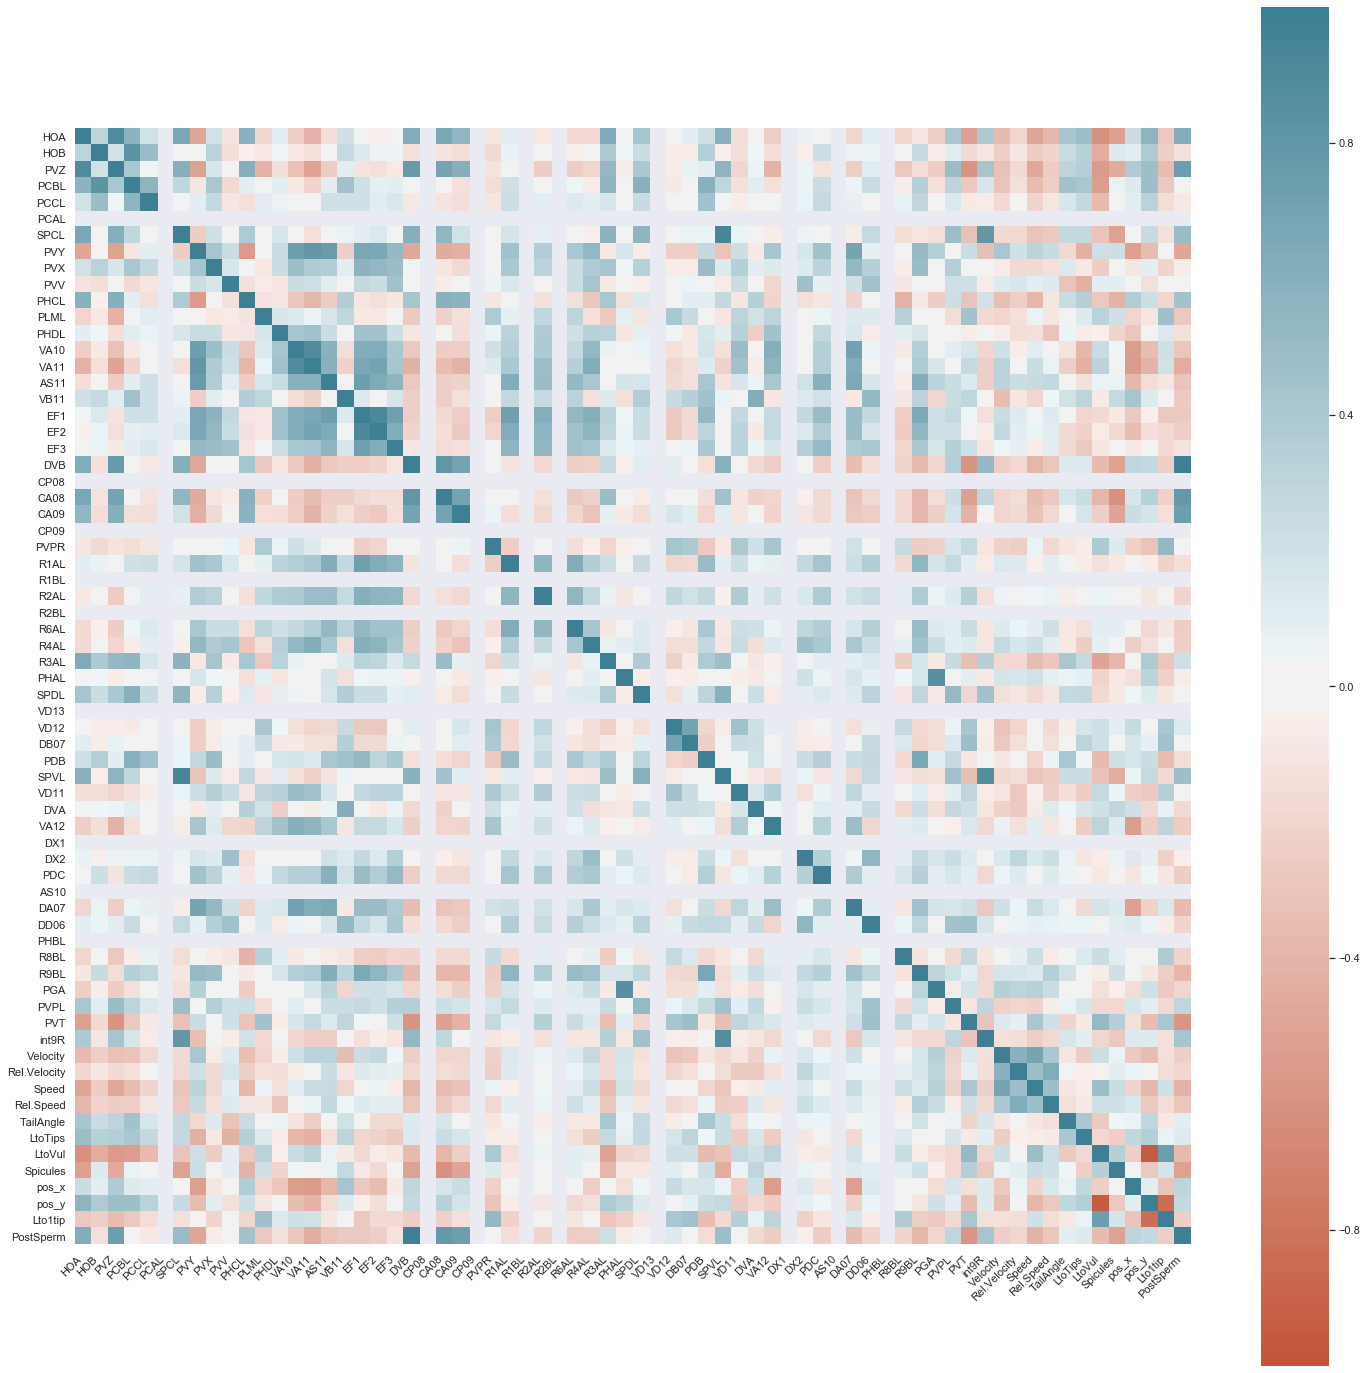

In [15]:
def correlation_heatmap(correlation):
    fig = plt.figure(figsize = (25,25))
    ax = fig.add_subplot(111)
    ax = sns.heatmap(
        correlation, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    plt.show()
    
correlation = df.corr()
correlation_heatmap(correlation)

In [16]:
df.dropna(axis =1, inplace=True)
df.head()

,HOA,HOB,PVZ,PCBL,PCCL,SPCL,PVY,PVX,PVV,PHCL,...,Velocity,Rel.Velocity,Speed,Rel.Speed,TailAngle,LtoTips,LtoVul,Spicules,Lto1tip,PostSperm
0,7.250564,0.196212,2.256619,1.553136,0.839921,4.466483,3.855752,1.544757,1.232114,4.806155,...,0.253924,0.0,37.668917,0.0,187.214567,1.0,1.0,0.534955,2.0,0
1,7.260670,-0.152221,1.918919,1.459072,0.793116,4.474740,3.963853,1.495721,1.197282,5.227208,...,0.501912,0.0,68.464884,0.0,204.706877,1.0,1.0,0.666670,2.0,0
2,7.267787,-0.114145,1.817382,1.507194,0.806910,4.395530,3.982662,1.488530,1.175287,5.285101,...,0.733739,0.0,100.783681,0.0,208.622899,1.0,1.0,0.717941,2.0,0
3,7.273302,-0.114833,1.794856,1.506020,0.807038,4.406843,3.945074,1.464047,1.162229,5.322292,...,0.936781,0.0,128.768896,0.0,202.844003,1.0,1.0,0.517402,2.0,0
4,7.277263,-0.120575,1.722357,1.508765,0.805350,4.416791,3.905746,1.383334,1.149996,5.359206,...,1.095309,0.0,149.802671,0.0,197.065107,1.0,1.0,0.482140,2.0,0


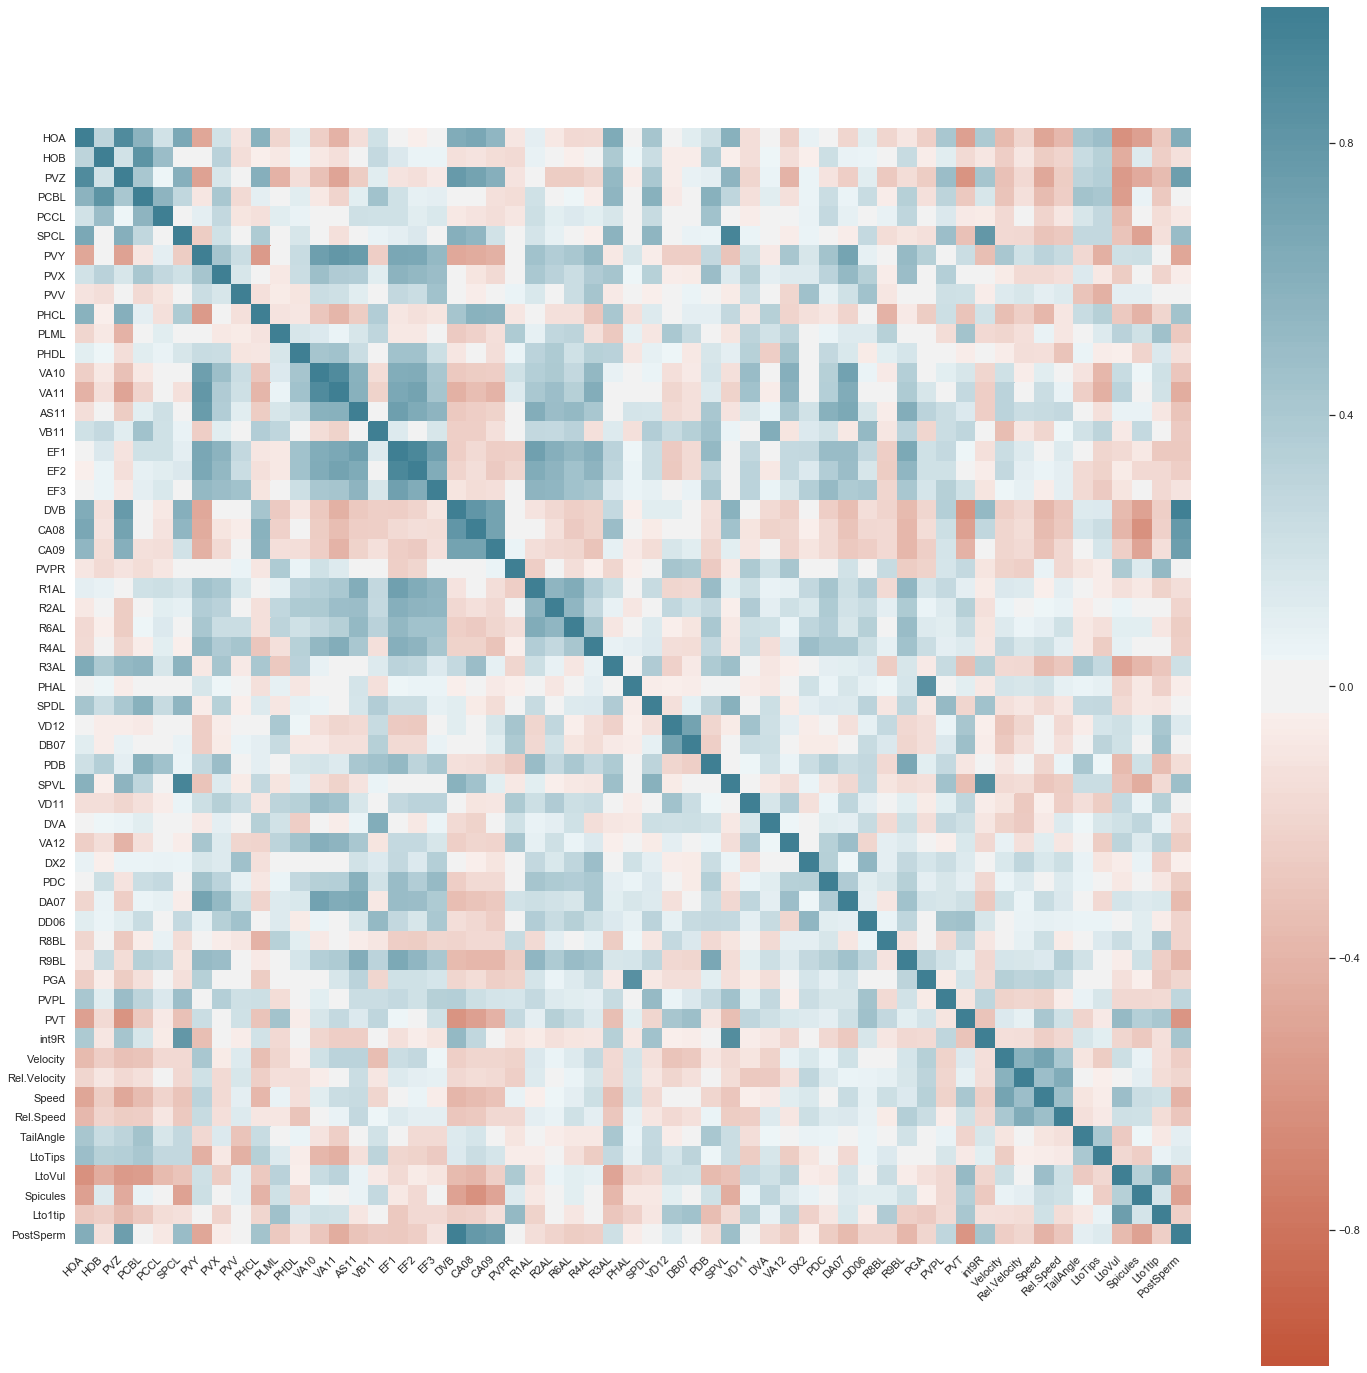

In [17]:
correlation = df.corr()
correlation_heatmap(correlation)

In [19]:
def standardize(df):
    columns = df.columns
    for i in columns:
        mean = np.mean(df[i])
        std = np.std(df[i])
        df[i] = (df[i] - mean) / std
    return df
standardize(df)


,HOA,HOB,PVZ,PCBL,PCCL,SPCL,PVY,PVX,PVV,PHCL,...,Velocity,Rel.Velocity,Speed,Rel.Speed,TailAngle,LtoTips,LtoVul,Spicules,Lto1tip,PostSperm
0,-0.280184,-0.156337,-0.894928,-0.301915,-0.107131,-0.170357,-1.460252,-1.089497,-0.318278,-0.533596,...,-0.076102,-0.581850,-0.459993,-1.129402,0.408870,1.430758,1.589840,0.928460,3.011556,-0.406758
1,-0.279445,-0.560470,-0.923502,-0.322288,-0.141726,-0.169051,-1.451859,-1.099815,-0.331432,-0.492930,...,0.511795,-0.581850,0.237727,-1.129402,1.214258,1.430758,1.589840,1.117819,3.011556,-0.406758
2,-0.278925,-0.516308,-0.932094,-0.311865,-0.131530,-0.181581,-1.450398,-1.101328,-0.339739,-0.487338,...,1.061379,-0.581850,0.969949,-1.129402,1.394561,1.430758,1.589840,1.191530,3.011556,-0.406758
3,-0.278522,-0.517105,-0.934000,-0.312120,-0.131435,-0.179792,-1.453317,-1.106480,-0.344670,-0.483746,...,1.542725,-0.581850,1.603987,-1.129402,1.128486,1.430758,1.589840,0.903224,3.011556,-0.406758
4,-0.278233,-0.523765,-0.940134,-0.311525,-0.132683,-0.178218,-1.456371,-1.123463,-0.349290,-0.480181,...,1.918542,-0.581850,2.080533,-1.129402,0.862412,1.430758,1.589840,0.852530,3.011556,-0.406758
5,-0.277255,-0.528708,-0.936554,-0.311043,-0.133940,-0.176816,-1.450730,-1.126016,-0.353944,-0.476525,...,2.161179,-0.581850,2.387943,-1.129402,0.596338,1.430758,1.589840,0.822940,3.011556,-0.406758
6,-0.276016,-0.480912,-0.950921,-0.290965,-0.123405,-0.168276,-1.451707,-1.115185,-0.358276,-0.472939,...,2.186259,-0.581850,2.425189,-1.129402,0.330264,1.430758,1.589840,0.866967,3.011556,-0.406758
7,-0.274833,-0.464497,-0.932979,-0.275170,-0.138828,-0.158247,-1.468348,-1.122925,-0.387305,-0.469991,...,1.822786,-0.581850,1.956739,-1.129402,0.064190,1.430758,1.589840,0.945535,3.011556,-0.406758
8,-0.300008,-0.439804,-0.900622,-0.266075,-0.125390,-0.147308,-1.479860,-1.145439,-0.401804,-0.466725,...,1.182127,-0.581850,1.120243,-1.129402,-0.201884,1.430758,1.589840,1.054008,3.011556,-0.406758
9,-0.290465,-0.403879,-0.871829,-0.239328,-0.115717,-0.181563,-1.484439,-1.147643,-0.417165,-0.440182,...,0.464706,-0.581850,0.178614,-1.129402,-0.202137,1.430758,1.589840,0.866411,3.011556,-0.406758


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.explained_variance_ratio_.sum()

0.8500722076159879

In [31]:
df_new = pca.fit_transform(df)
df_new = pd.DataFrame(df_new,columns=[i+1 for i in range(15)])
df_new.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-2.132329,-5.352456,1.555016,1.140096,-2.171653,2.678636,-0.258081,0.398006,-2.035030,-0.763146,-0.877821,1.624136,-0.513908,1.787060,0.358053
1,-1.366542,-5.065125,2.694407,0.726984,-1.604947,2.994430,-0.740738,0.142248,-1.726806,-1.934680,-0.650704,1.656735,-0.201454,0.721993,-0.388962
2,-1.367786,-5.240808,2.414818,0.731905,-1.441030,3.421853,-0.547845,-0.009526,-1.458424,-2.183017,-0.525445,1.740038,-0.159078,0.761378,-0.238794
3,-1.222801,-5.322361,2.192947,0.630468,-1.246157,3.620192,-0.619166,-0.144888,-1.418433,-2.273903,-0.292699,1.614378,-0.139822,0.831441,-0.231401
4,-1.090717,-5.418506,2.043111,0.564655,-1.096197,3.748412,-0.633438,-0.233523,-1.371512,-2.331906,-0.139604,1.504717,-0.094886,0.861044,-0.215264


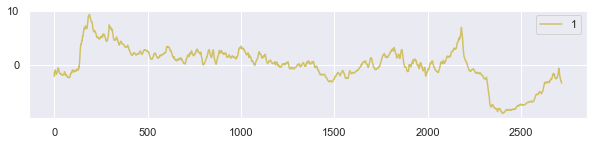

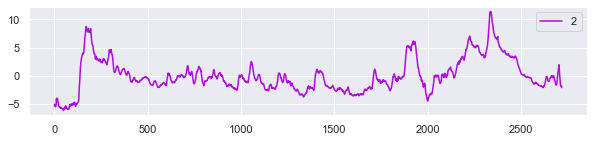

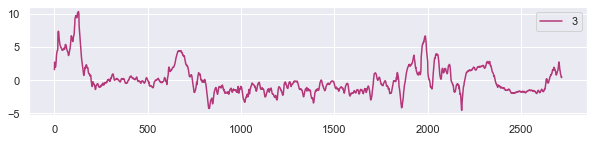

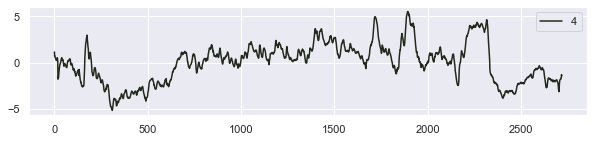

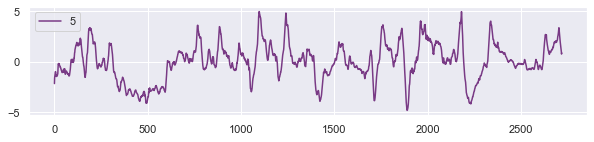

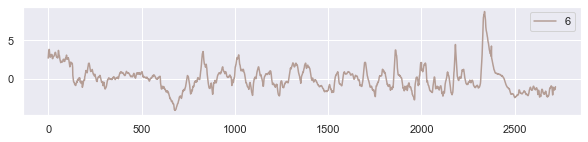

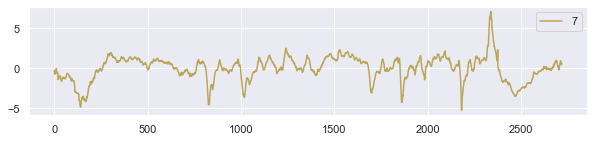

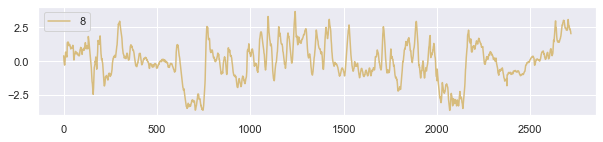

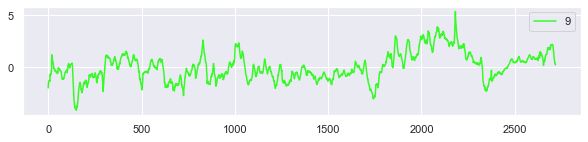

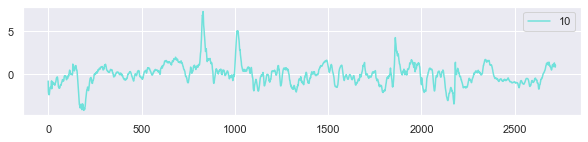

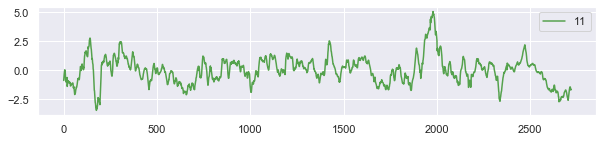

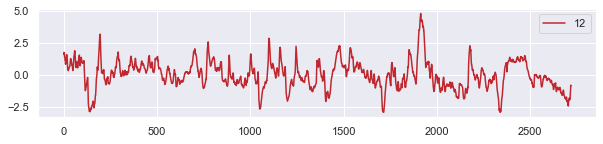

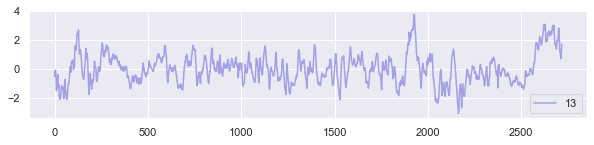

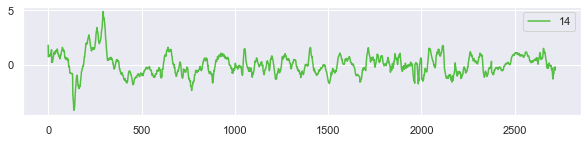

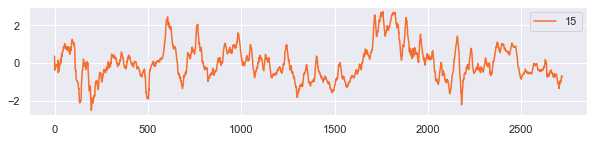

In [36]:
columns = df_new.columns
columns_num = len(columns) 

for i in range(columns_num):
    plt.figure(figsize=(10,2))
    plt.plot(df_new[columns[i]],label = columns[i],c=np.random.rand(3,))
    plt.legend()
    plt.show()

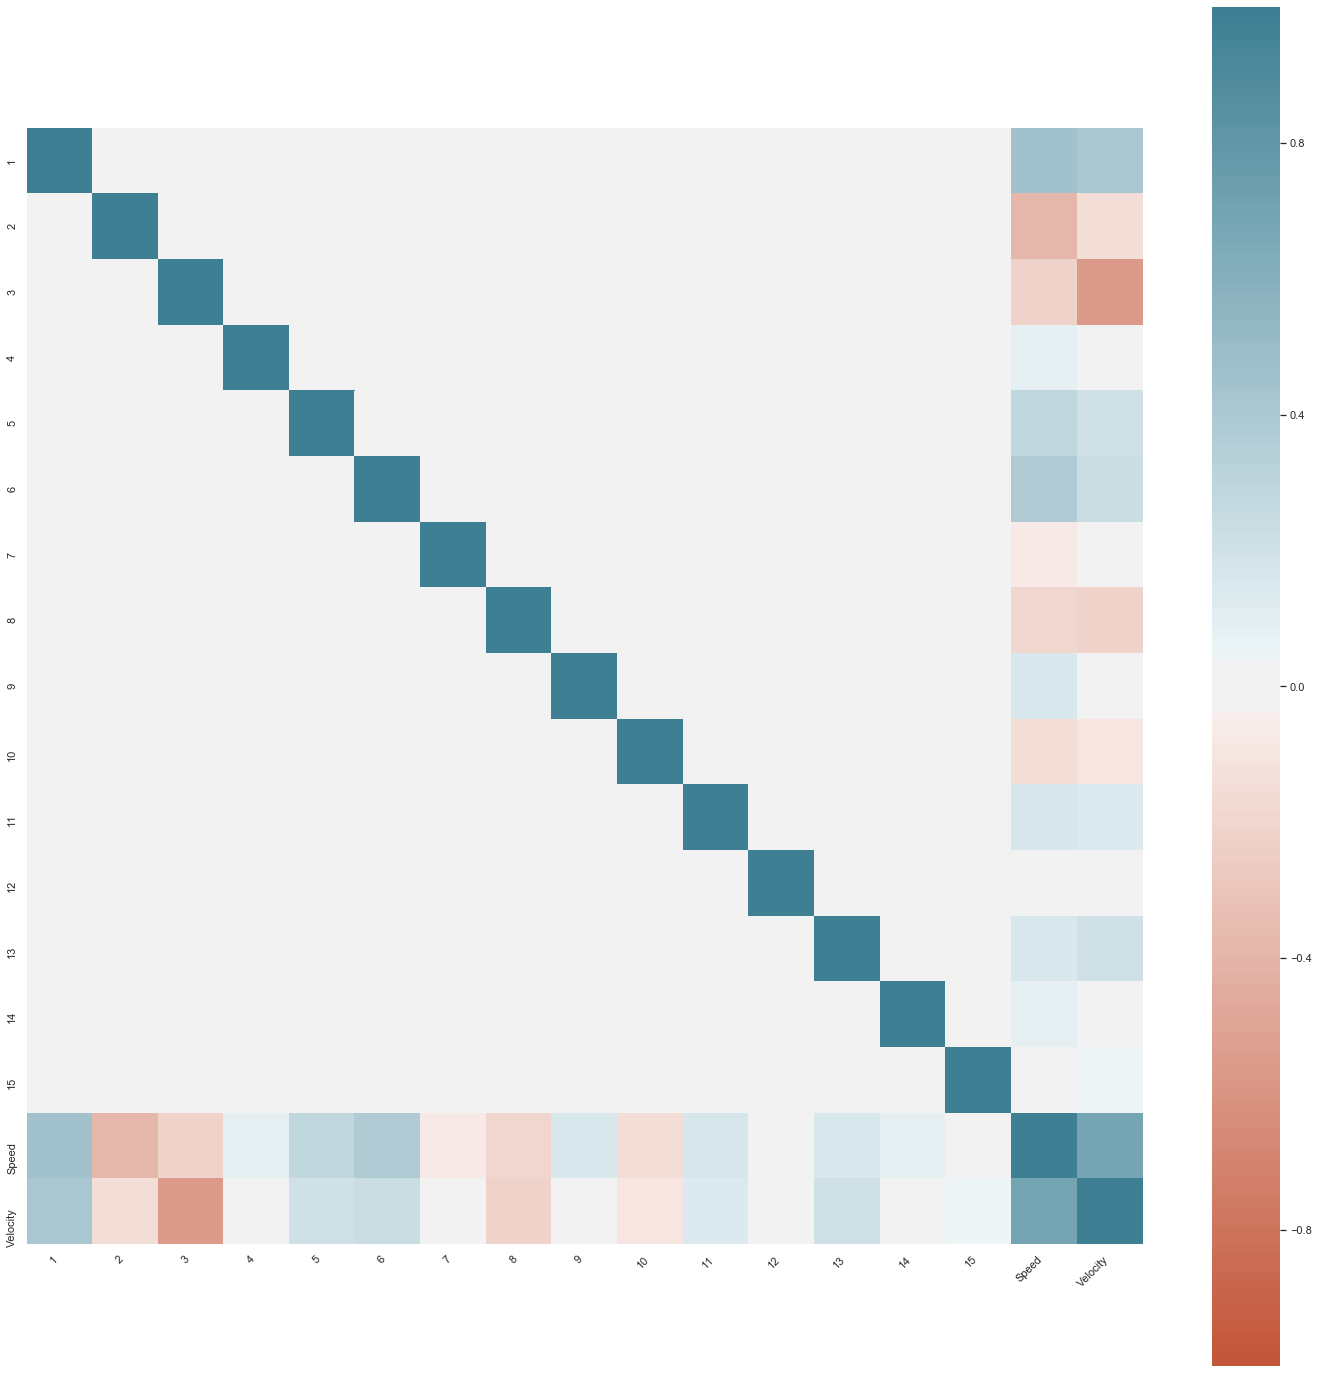

In [40]:
df_new['Velocity'] = df['Velocity']
correlation_heatmap(df_new.corr())